# Lab 1

<b>Class:</b> MSDS 7331 Data Mining
<br> <b>Dataset:</b> Belk Endowment Educational Attainment Data 

<h1 style="font-size:150%;"> Teammates </h1>
Maryam Shahini
<br> Murtada Shubbar
<br> Michael Toolin
<br> Steven Millett

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import math
import re
#import statistics

%matplotlib inline

In [2]:
#
# The 2017 Public Schools Machine Learning Date Set is being used throughout this analysis.  The _ML suffix is removed to less name space size
#
# Load Full Public School Data Frames for each year
#
school_data = pd.read_csv('./Data/2017/machine Learning Datasets/PublicSchools2017_ML.csv', low_memory=False)

# Business Understanding 

The North Carolina General Assmebly passed legislation in 2014-2014 requiring the assignment of School Performance Grades (SPG) for public and charter Schools [1].  This data set is collected in response to this legislation.  A school's SPG is calculated using 80% of the schools achievment score and 20% of the schools growth score.  The achievment score is calculated through a variety of student testing and the growth score is calculated using the EVASS School Accountablityy Growth Composite Index [2]. Schools are assigned a letter grade where A: 100-85 points, B: 84-70 points, C: 69-55 points, D: 54-40 points and F: less than 40 points.  Schools that receive grades of D or F are required by to inform parents of the school district.  In 2016, the North Carolina General Assmebly passed legislation creating the Achievment School District(ASD). This school district is run by a private organization and are run as charter schools [3].

This data set contains 334 features describing 2443 schools.  The data includes testing results used to derive the SPG described above.  It also contains school financial data, demographic information, attendence, and student behavior data measured by metrics such as susupension and expulsions. We can look into all these different types of information to see if any correlation with school performances exists, both good and bad.  Do poorly performing schools line up with any specific demographics?  Are there school financial situations that help attribute to a schools performance? Finding correlations of this data with SPG and being able to use that information in a predictive analysis algorithm may help educators identify schools before the perfomance metrics deteriorate, allowing them to intervene. The end result of all the testing and analaysis is providing all students a fair and equal opportunity at a qualtiy eduction.

We are examining this data set from the point of view of trying find correlations with SPG Score for each LEA.  SPG Score is a continous variable, but there is also a group of categorical variables describing SPG Score.  We are choosing to examine the data from continous variable point of view, although at times we do use the categorical group for certain visualizations. This choice leads us to a use regression model, where we can validate that model with 'k fold' cross validation for accuracy.

[1] source: http://schools.cms.k12.nc.us/jhgunnES/Documents/School%20Performance%20Grade%20PP%20January%2014,%202015%20(1).pptx<br>
[2] (EVASS Growth information available at http://www.ncpublicschools.org/effectiveness-model/evaas/selection/)<br>
[3] source: https://www.ncforum.org/committee-on-low-performing-schools/

###citation: Drew J., The Belk Endowment Educational Attainment Data Repository for North Carolina Public Schools, (2018), GitHub repository, https://github.com/jakemdrew/EducationDataNC


# Data Meaning Type 

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

The comprehensive description of all 334 attributes can be found in the data-dictionary.pdf associated with the NC Report Card database provided by Dr. Drew. We were interested in 60 variables moving forward in the course. We visualize several attributes of interest in this report.  

<img src="files/data_meaning.jpg">

In [3]:
school_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443 entries, 0 to 2442
Data columns (total 334 columns):
student_num                                                     float64
lea_avg_student_num                                             float64
st_avg_student_num                                              float64
00_Size                                                         float64
02_Size                                                         float64
03_Size                                                         float64
04_Size                                                         float64
05_Size                                                         float64
Math I_Size                                                     float64
lea_total_expense_num                                           float64
lea_salary_expense_pct                                          float64
lea_services_expense_pct                                        float64
lea_supplies_expense_pct    

# Data Quality

Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.
There is no missing values in our dataset to worry about.

In [4]:
# to find the missing values if any:
#Print out all the missing value rows
pd.set_option('display.max_rows', 10000)

print('\r\n**The Remaining Missing Values Below will be set to Zero!**')

#Check for Missing values 
missing_values = school_data.isnull().sum().reset_index()
missing_values.columns = ['Variable Name', 'Number Missing Values']
missing_values = missing_values[missing_values['Number Missing Values'] > 0] 
missing_values



**The Remaining Missing Values Below will be set to Zero!**


,Variable Name,Number Missing Values


In [5]:
from scipy import stats

def getNumOfOutliers(row, avg, std, alpha=.05):
    x = 0
    for cell in row:
        if (cell>avg+std*stats.t.ppf(1-alpha, 999)) or (cell<avg-std*stats.t.ppf(1-alpha, 999)):
            x=x+1
    return x

def getNumOfZeroes(row):
    x = 0
    for cell in row:
        if cell==0:
            x=x+1
    return x

In [6]:
#Note this section is time intensive, it can take 5 minutes to run. 
outlier_plot = school_data.loc[:,school_data.dtypes==float].columns

outlier_mean = school_data[outlier_plot].apply(lambda row: statistics.mean(row))

outlier_data = pd.DataFrame(data={'mean':outlier_mean},index=outlier_plot)

outlier_data['std'] = school_data[outlier_plot].apply(lambda row: statistics.stdev(row))

#Here is the offending, that takes a while to run.
outlier_data['NumberOfOutliers'] = school_data[outlier_plot].apply(lambda row: getNumOfOutliers(row, statistics.mean(row),statistics.stdev(row),.00000000000000009 ))

NameError: ("name 'statistics' is not defined", 'occurred at index student_num')

In [7]:
outlier_data['NumberOfZeroes'] = school_data[outlier_plot].apply(lambda row: getNumOfZeroes(row))

NameError: name 'outlier_data' is not defined

# Simple Statistics

Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 

In [8]:
school_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
student_num,2443.0,584.173966,386.933479,5.000,337.500000,512.000000,725.000000,2974.000000
lea_avg_student_num,2443.0,584.245600,271.986506,5.000,427.500000,529.000000,683.000000,1852.000000
st_avg_student_num,2443.0,586.074089,150.150219,278.000,490.000000,490.000000,629.000000,853.000000
00_Size,2443.0,9.969709,9.588669,0.000,0.000000,14.000000,19.000000,27.000000
02_Size,2443.0,10.153090,9.756678,0.000,0.000000,14.000000,20.000000,28.000000
03_Size,2443.0,10.067131,9.756138,0.000,0.000000,14.000000,20.000000,40.000000
04_Size,2443.0,11.209578,10.842040,0.000,0.000000,15.000000,21.000000,44.000000
05_Size,2443.0,11.152272,11.173440,0.000,0.000000,14.000000,22.000000,68.000000
Math I_Size,2443.0,8.808023,11.225975,0.000,0.000000,0.000000,19.000000,42.000000
lea_total_expense_num,2443.0,9337.465980,1014.397854,8150.840,8731.670000,9008.240000,9740.490000,17718.540000


In [9]:
school_data_simple = school_data[['SPG Score','lea_avg_student_num','student_num']]
school_data_simple.describe()

,SPG Score,lea_avg_student_num,student_num
count,2443.000000,2443.000000,2443.000000
mean,60.911584,584.245600,584.173966
std,19.573094,271.986506,386.933479
min,0.000000,5.000000,5.000000
25%,53.000000,427.500000,337.500000
50%,64.000000,529.000000,512.000000
75%,73.000000,683.000000,725.000000
max,100.000000,1852.000000,2974.000000


### Simple Statistics on SPG Score, and number of students in schools
The table above show us statistics for SPG.  Understanding the mean SPG score is 60.91, which is in the lower part of the "C" range.  The median SPG score
is 64.00, also in "C" range.  It is surprising to see a maximum SPG score of 100 as this indicates perfect scoring for some individual school.  Also the minimum score of 0 mean total failure in testing.  Both of these data points require more investigation to see if see if there are any errors in the data and where these points come from.

In [10]:
# Find the schools whose SPG =1 00
school_SPG_100 =(school_data.loc[school_data['SPG Score'] == 100])
print (school_SPG_100['unit_code'])

371    190501
Name: unit_code, dtype: int64


The school with unit code 190501 has a perfect SPG. The data in this field should be examined for errors or to understand why they received a perfect SPG.

In [11]:
# Find the schools whose SPG = 0  Purposely coded different than above to show various coding techniques
school_SPG_0 =(school_data['unit_code'].loc[school_data['SPG Score'] == 0])
print (school_SPG_0)

24       10378
51       40305
74       60334
77       70302
79       70310
115     100308
131     110303
169     110432
184     120308
199     120352
221     130317
238     130336
259     140306
260     140307
291     160309
317     180323
356     190310
379     200322
389     210316
401     230330
414     230359
442     241312
444     241320
470     260302
498     260363
509     260374
530     260412
531     260413
544     260432
550     260449
569     280306
583     290310
585     290314
617     291348
618     291350
624     300306
666     320322
673     320336
677     320341
726     340336
727     340344
741     340385
744     340398
752     340427
756     340436
787     340531
820     360338
828     360372
834     360394
842     360430
861     360499
879     390314
899     400321
929     410379
937     410396
964     410457
965     410458
970     410464
998     410533
999     410534
1045    430304
1054    430340
1056    430345
1064    430368
1076    440326
1106    450343
1127    47

The list above shows 130 schools with SPG = 0.  This is more problematic than the single school whose SPG = 100.  Nonetheless we need to understand why 130 schools had an SPG = 0 and requires future investigation.

In [12]:
school_data_finance = school_data[['lea_total_expense_num','lea_salary_expense_pct',
                                  'lea_services_expense_pct', 'lea_supplies_expense_pct',
                                  'lea_instruct_equip_exp_pct']]
school_data_finance.describe()

,lea_total_expense_num,lea_salary_expense_pct,lea_services_expense_pct,lea_supplies_expense_pct,lea_instruct_equip_exp_pct
count,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000
mean,9337.465980,0.834615,0.079380,0.076526,0.009479
std,1014.397854,0.024518,0.015031,0.015094,0.006666
min,8150.840000,0.761000,0.052000,0.028000,0.001000
25%,8731.670000,0.816000,0.069000,0.069000,0.006000
50%,9008.240000,0.835000,0.079000,0.078000,0.009000
75%,9740.490000,0.852000,0.085000,0.091000,0.012000
max,17718.540000,0.878000,0.148000,0.117000,0.045000


Looking at the expenses, the LEA with largest number of expenses is 90% higher than the mean for all LEA's in the state.  All other quantiles are closer to the mean, indicating a good chance this in outlier.  We will look for this school to see if there are errors in the data and consider how to handle this.

In [13]:
# Add
# Find the schools whose SPG = 0  Purposely coded different than above to show various coding techniques
school_lea_exp_max =(school_data['unit_code'].loc[school_data['lea_total_expense_num'] == 17718.54])
print (school_lea_exp_max)

1132    480306
1133    480316
1134    480318
Name: unit_code, dtype: int64


It is interesting to note that three LEA's have the same exact expense number and that number is the maximum that appears in the data set.  Understanding this is an area for future investigation.

In [14]:
demog_male_cols = [col for col in school_data.columns if "Male" in col]
demog_female_cols = [col for col in school_data.columns if "male" in col]
school_data_demog_male = school_data[np.intersect1d(school_data.columns, demog_male_cols)]
school_data_demog_female = school_data[np.intersect1d(school_data.columns, demog_female_cols)]
school_data_demog_all = pd.concat([school_data_demog_female, school_data_demog_male], axis=1)
school_data_demog = school_data_demog_all.filter(regex='^(?!(EOC|Two).*?)') 

school_data_demog.describe()

,AsianFemalePct,BlackFemalePct,HispanicFemalePct,IndianFemalePct,MinorityFemalePct,PacificIslandFemalePct,AsianMalePct,BlackMalePct,HispanicMalePct,MinorityMalePct,PacificIslandMalePct
count,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000
mean,0.012284,0.128583,0.082390,0.006774,0.250685,0.000643,0.012858,0.136726,0.085380,0.263320,0.000647
std,0.023180,0.113157,0.063890,0.031991,0.135215,0.001643,0.025016,0.123180,0.065805,0.145042,0.001948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035782,0.037125,0.000000,0.139039,0.000000,0.000000,0.037559,0.038503,0.140693,0.000000
50%,0.004902,0.100719,0.064240,0.000897,0.237443,0.000000,0.004967,0.105263,0.066986,0.247166,0.000000
75%,0.013634,0.195891,0.110004,0.003115,0.356408,0.000000,0.014103,0.206682,0.113101,0.376314,0.000000
max,0.316042,0.861386,0.419355,0.450413,0.970297,0.037162,0.338136,0.910569,0.412442,1.000000,0.057432


The above table shows actual quantile breakdown by minority demographics.  It is interesting to note there is at least one LEA that has 0 minorities and at least one where the entire male population is made up of minorities.  Identifying these LEA's may provide some information.

# Visualize Attributes

Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

In [15]:
def prefixsearch(search_string, missing_value ,start_of_search_string,end_of_search_string):
    if re.search(end_of_search_string, search_string):
        return re.search('('+ start_of_search_string +'\S*)(?='+ end_of_search_string +')',search_string).group(0)
    else:
        return missing_value



In [16]:
teacher_temp_col = [col for col in school_data.columns if 'tchyrs' in col]
teacher_columns = school_data[teacher_temp_col].melt(var_name='col',value_name='values')

teacher_columns['year'] = teacher_columns['col'].apply(lambda name: re.search('(?<=tchyrs_)\S*(?=_)',name).group(0))
teacher_columns['region'] = teacher_columns['col'].apply(lambda name: prefixsearch(name, "Sch", '^\S*','_tch'))



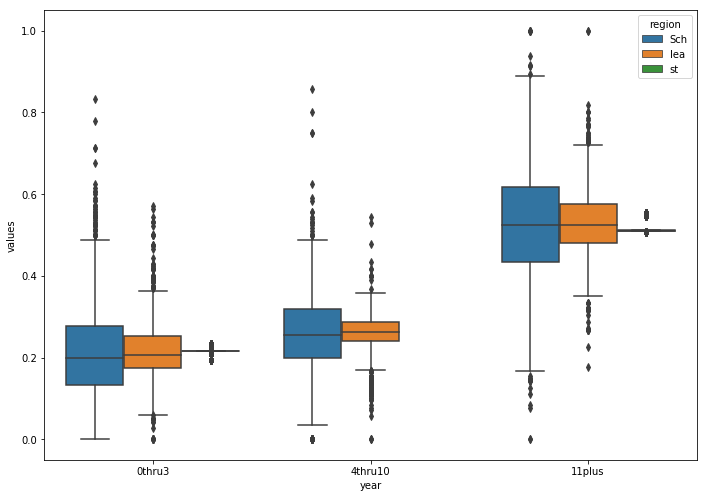

In [17]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,data=teacher_columns,x='year', y='values', hue='region');

## Makeup of teachers in classrooms
In the graph above we are looking at the percentage of teachers that makeup a classroom based on their years of tenure.  North Carolina has relatively experienced teaching staff.  We can guess that teachers with less experience are younger than those with more expereince. The number of teachers with 0-3 years of experience could be an issue as older teachers start to retire and move out of the education system.  Perhaps a teacher recruiting campaign across the state will be needed in the upcoming years.

In [20]:
sex_temp_col = school_data.filter(regex=('[Mm]alePct')).columns
sex_teacher_columns = school_data[sex_temp_col].melt(var_name='col',value_name='Values')

sex_teacher_columns['Race'] = sex_teacher_columns['col'].apply(lambda name: prefixsearch(name, "", '^','Male|Female'))
sex_teacher_columns['Sex'] = sex_teacher_columns['col'].apply(lambda name: 'Female' if re.search('Female',name) else 'Male')



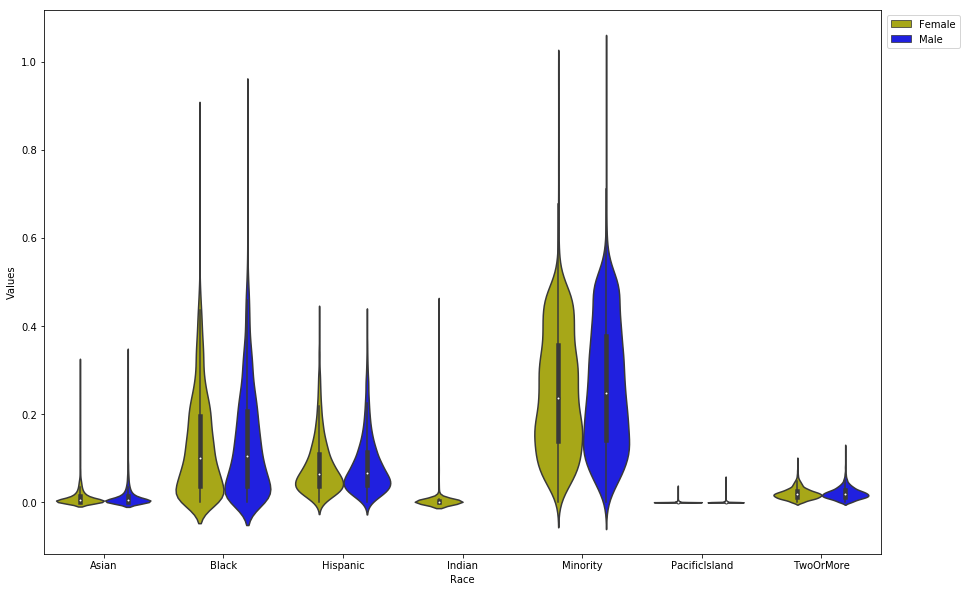

In [19]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax,x='Race',y='Values',hue='Sex',data=sex_teacher_columns,palette={"Male": "b", "Female": "y"});

leg = plt.legend( loc = 'upper right')

plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = .1
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


# Update the plot
plt.show()

## Makeup of minorities in classrooms

In the graph above we are looking at the percentage of minorities that makeup a classroom as represented with a violin plot. Each half of the violin represents the different sexual make-up of each race. For the most part each gender is equally represented in the classroom.  This plot validates the earlier observation that there is at least one school where the males are 100% minorities.  Curiously we have no males of the Indian race.


In [21]:
support_col = school_data.filter(regex=('wap|books|stud_internet')).columns
support_columns = school_data[support_col].melt(var_name='col',value_name='Values')

support_columns = support_columns[support_columns['Values']!=0]

support_columns['Values'] = support_columns['Values'].apply(lambda value: math.log(value))


#support_columns['media'] = sex_teacher_columns['col'].apply(lambda name: 'Female' if re.search('Female',name) else 'Male')

support_columns['region'] = support_columns['col'].apply(lambda name: prefixsearch(name, "Sch", '^\S*','_wap|_books|_stud_int'))
support_columns['media'] = support_columns['col'].apply(lambda name: re.sub('lea_','',name) if re.search('lea',name) else name )
support_columns = support_columns.sort_values(by='Values')
#print(support_columns.sample(20))

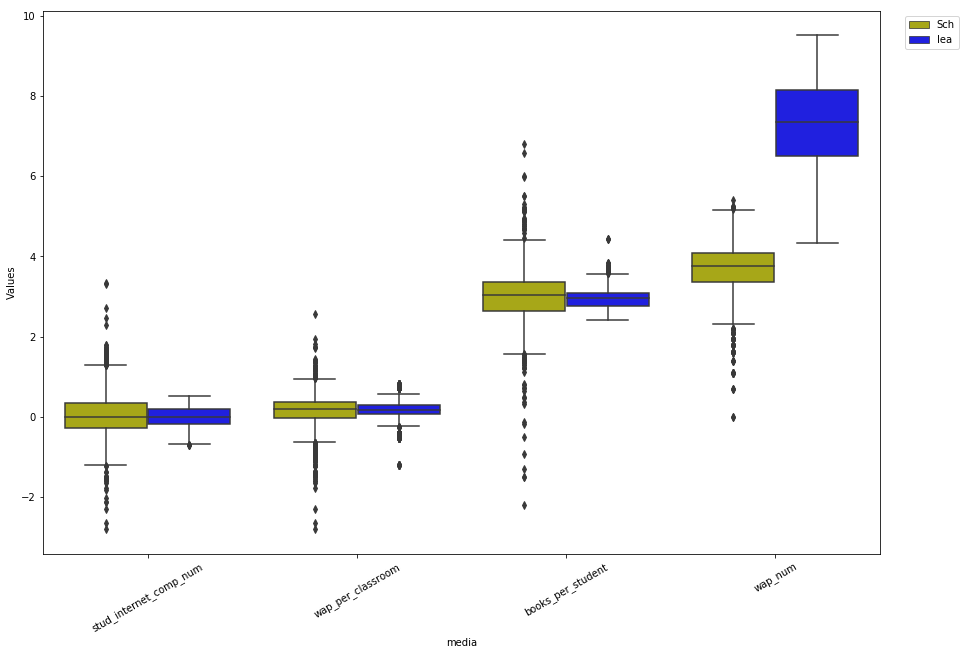

In [22]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,x='media',y='Values',hue='region',data=support_columns,palette={"lea": "b", "Sch": "y"});
plt.xticks(rotation=30)

leg = plt.legend( loc = 'upper right')

plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = .1
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


# Update the plot
plt.show()

## Media and Computer resources available
# Look at this data as why do we have negative numbers?  Neg Books/Student?
These box plots map the difference in the amount of resources that the average LEA has and the variance per school. One observatio from this plot is all LEA's have at least 4 WAP's, however there is at least one that does not have any.  


In [24]:
TCHR_col = school_data.filter(regex=('TCHR_Standard')).columns
TCHR_columns = school_data[TCHR_col].melt(var_name='col',value_name='Values')


TCHR_columns['Standard'] = TCHR_columns['col'].apply(lambda name: re.search('(?<=TCHR_).*(?=_Pct)',name).group(0))
TCHR_columns['Level'] = TCHR_columns['col'].apply(lambda name: re.search('(?<=^).*(?=_TCHR)',name).group(0))

print(TCHR_columns)

                                    col  Values    Standard         Level
0      Accomplished_TCHR_Standard 1_Pct   0.778  Standard 1  Accomplished
1      Accomplished_TCHR_Standard 1_Pct   0.750  Standard 1  Accomplished
2      Accomplished_TCHR_Standard 1_Pct   0.525  Standard 1  Accomplished
3      Accomplished_TCHR_Standard 1_Pct   0.423  Standard 1  Accomplished
4      Accomplished_TCHR_Standard 1_Pct   0.689  Standard 1  Accomplished
5      Accomplished_TCHR_Standard 1_Pct   0.406  Standard 1  Accomplished
6      Accomplished_TCHR_Standard 1_Pct   0.667  Standard 1  Accomplished
7      Accomplished_TCHR_Standard 1_Pct   0.438  Standard 1  Accomplished
8      Accomplished_TCHR_Standard 1_Pct   0.600  Standard 1  Accomplished
9      Accomplished_TCHR_Standard 1_Pct   0.682  Standard 1  Accomplished
10     Accomplished_TCHR_Standard 1_Pct   0.625  Standard 1  Accomplished
11     Accomplished_TCHR_Standard 1_Pct   0.440  Standard 1  Accomplished
12     Accomplished_TCHR_Standard 1_Pc

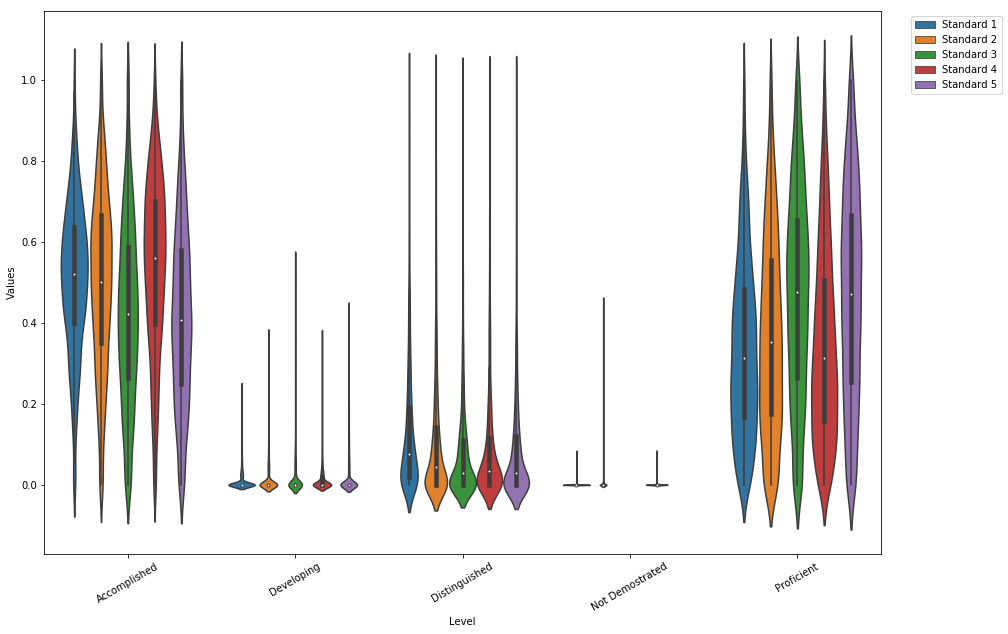

In [26]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax,x='Level',y='Values',hue='Standard',data=TCHR_columns);
plt.xticks(rotation=30)


leg = plt.legend( loc = 'upper right')

plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = .15
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


# Update the plot
plt.show()

## Educator Effectiveness
Teachers are evaluated on Standards 1-6, however the data set we used only contained Standards 1-5.  These standards highlight how well teachers understand each of these standards.  The plot above shows the North Carolina teachers have a heavy distribution in the Accomplished and Proficient categories.  There are more teachers in the Distinguished category than the Developing category, leading us to believe the teachers have a solid understanding of the standards they are tested against.

In [31]:
EOG_col = school_data.filter(regex=('EOGG')).columns
EOG_columns = school_data[EOG_col].melt(var_name='col',value_name='Values')

EOG_columns['Grade'] = EOG_columns['col'].apply(lambda name: re.search('(?<=EOG).*(?=_[CG])',name).group(0))
EOG_columns['Level'] = EOG_columns['col'].apply(lambda name: re.split('EOGGr[3-5]_',name)[1])

EOG_columns = EOG_columns.sort_values(by='Level')

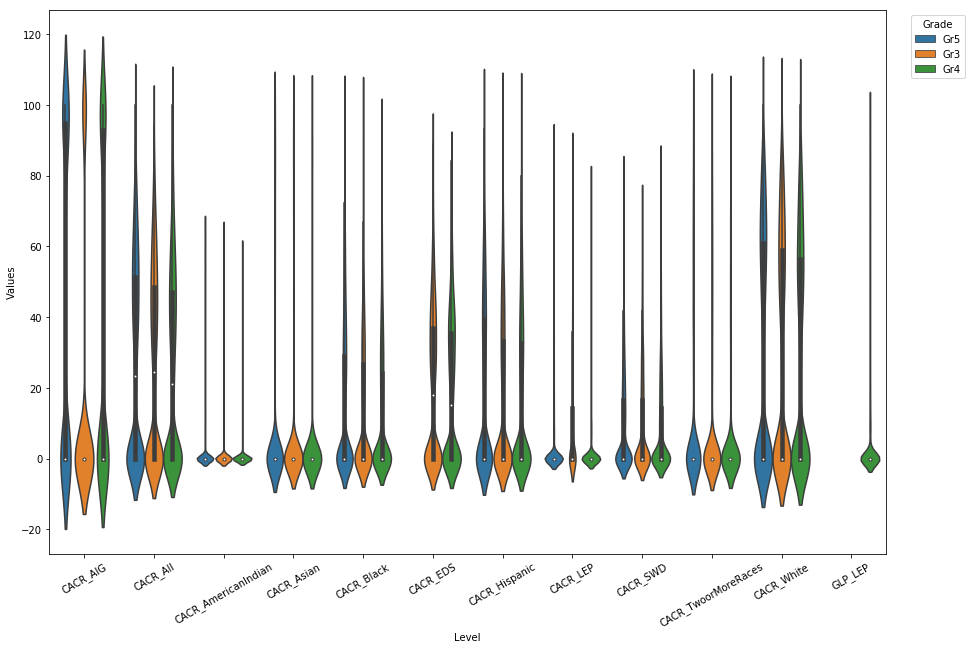

In [28]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.violinplot(ax=ax,x='Level',y='Values',hue='Grade',data=EOG_columns);
plt.xticks(rotation=30)

leg = plt.legend( loc = 'upper right',title='Grade')

plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = .1
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


# Update the plot
plt.show()

# Here is some text about the EOG stats

In [29]:
EOC_col = school_data.filter(regex=('^EOC')).columns
EOC_columns = school_data[EOC_col].melt(var_name='col',value_name='Values')

EOC_columns['Subject'] = EOC_columns['col'].apply(lambda name: re.search('(?<=EOC).*(?=_[CG])',name).group(0))
EOC_columns['Level'] = EOC_columns['col'].apply(lambda name: re.split('EOC(Subjects|MathI)_',name)[2])

EOC_columns = EOC_columns.sort_values(by='Level')

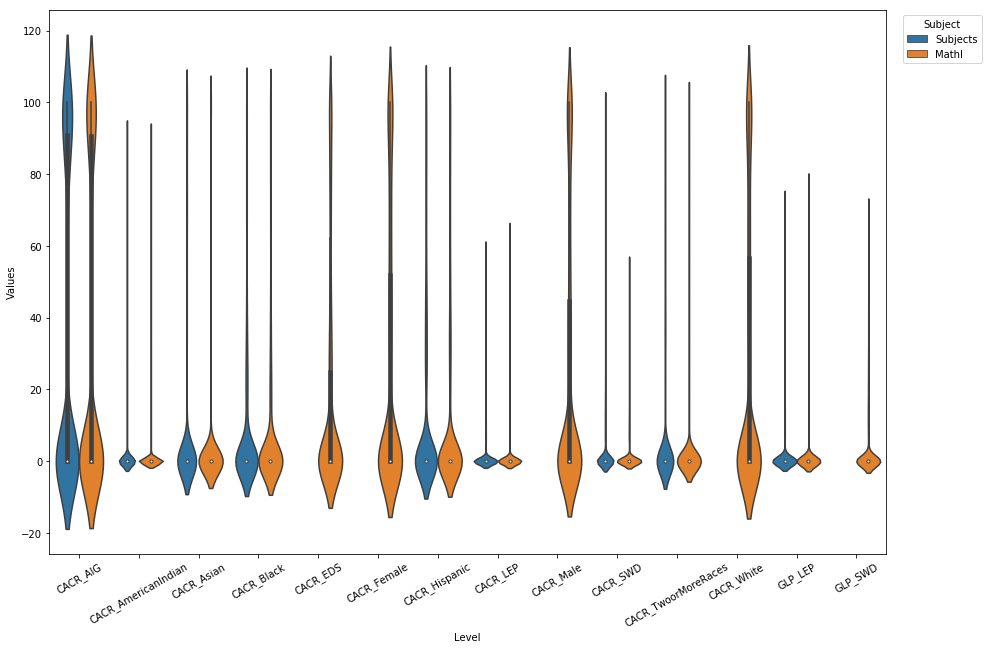

In [30]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax,x='Level',y='Values',hue='Subject',data=EOC_columns);
plt.xticks(rotation=30)

leg = plt.legend( loc = 'upper right',title='Subject')

plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = .12
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


# Update the plot
plt.show()

# Here is some text about the EOG stats

# Explore Joint Attributes

Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

Correlation matrix heatmap: between funding and SPG scores/benchmark grades ---add description.  

In [ ]:
first_heat = school_data[['lea_total_expense_num',
'lea_salary_expense_pct',
'lea_services_expense_pct',
'lea_supplies_expense_pct',
'lea_instruct_equip_exp_pct',
'lea_federal_perpupil_num',
'lea_local_perpupil_num',
'lea_state_perpupil_num',            
'SPG Score',
'Reading SPG Score',
'EVAAS Growth Score',
'lea_sat_avg_score_num',
'lea_sat_participation_pct',
'lea_ap_participation_pct',
'lea_ap_pct_3_or_above',]] 
                       
first_corr = first_heat.corr()

plt.figure(figsize = (14,10)) #size of matrix 
sns.heatmap(first_corr,linewidths=0.5, annot=True); #add correrlation inside boxes

In [ ]:
Correlation matrix heatmap: between funding and attendance/crime rate ---add description.

In [ ]:
snd_heat = school_data[['lea_total_expense_num',
'lea_salary_expense_pct',
'lea_services_expense_pct',
'lea_supplies_expense_pct',
'lea_instruct_equip_exp_pct',
'lea_federal_perpupil_num',
'lea_local_perpupil_num',
'lea_state_perpupil_num',            
'lea_avg_daily_attend_pct',
'lea_crime_per_c_num',
'lea_short_susp_per_c_num',
'lea_long_susp_per_c_num',
'lea_expelled_per_c_num',]] 

                       
snd_corr = snd_heat.corr()

plt.figure(figsize = (14,10)) #size of matrix 
sns.heatmap(snd_corr,cmap='RdYlGn_r', linewidths=0.5, annot=True); #add correrlation inside boxes

Correlation matrix heatmap: between race,gender, region ---add description.

In [ ]:
thd_heat = school_data[['SBE District_Northeast',
'SBE District_Northwest',
'SBE District_Piedmont-Triad',
'SBE District_Sandhills',
'SBE District_Southeast',
'SBE District_Southwest',
'SBE District_Western',
'AsianFemalePct',            
'AsianMalePct',
'BlackFemalePct',
'BlackMalePct',
'HispanicFemalePct',
'HispanicMalePct',
'PacificIslandFemalePct',                        
'PacificIslandMalePct',                      
'MinorityFemalePct',
'MinorityMalePct',]] 

                       
thd_corr = thd_heat.corr()

plt.figure(figsize = (14,10)) #size of matrix 
sns.heatmap(thd_corr,linewidths=0.5,annot=True); #add correrlation inside boxes

In [ ]:
df = pd.DataFrame(data = school_data)

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 20))

In [ ]:
df_heat = school_data[['SPG Score', 'MinorityFemalePct','MinorityMalePct',
                       'BlackFemalePct', 'BlackMalePct', 'IndianFemalePct',
                       'AsianFemalePct', 'AsianMalePct' , 'HispanicFemalePct', 'HispanicMalePct', ]]
df_heat_corr = df_heat.corr()

plt.figure(figsize = (16,12))
sns.heatmap(df_heat_corr,annot=True);

# Explore Attributes and Class

Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

In [ ]:
df=pd.DataFrame(school_data)

In [ ]:
def correlation_matrix(school_data):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    
      
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    cmap=cm.get_cmap('jet',30)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    labels=['column_names',]
    plt.title('Columns Correlations')
    ax1.set_xticklabels(labels,fontsize=3)
    ax1.set_yticklabels(labels,fontsize=3)
    # Add colorbar
    fig.colorbar(cax, ticks=[-1,-.95,-.90,0,.05,.1,.15,.2,.25,.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)

In [ ]:
df_heat = school_data[['SPG Score', 'flicensed_teach_pct',#school nad teacher characters
                    'lea_local_perpupil_num','lea_total_expense_num','lea_salary_expense_pct', #funding
                    'lea_supplies_expense_pct','stud_internet_comp_num',#funding
                    'avg_daily_attend_pct','crime_per_c_num', ]] #environment
df_heat_corr = df_heat.corr()

plt.figure(figsize = (16,12))
sns.heatmap(df_heat_corr,annot=True);

In [ ]:
#Created a categorical multiclass variable from SP Grade
SPG_Grade_col = school_data.filter(regex=('^SPG\WGrade')).columns
school_data['SPG Grade']= school_data[SPG_Grade_col].apply(lambda row:'A' if row.any()!=1 else 
                                 row[0]*'A+NG'+row[1]*'B'+row[2]*'C'+row[3]*'D'+row[4]*'F'+row[5]*'I',axis=1)

In [ ]:
expense=school_data[['SPG Score', 'SPG Grade', 'lea_salary_expense_pct', 'lea_services_expense_pct', 'lea_supplies_expense_pct', 'lea_instruct_equip_exp_pct']]

sns.pairplot(expense, hue='SPG Grade');

In [ ]:
minority=school_data[['SPG Score', 'SPG Grade', 'Asian', 'Black', 'Minority', 'Hispanic']]
sns.pairplot(minority, hue='SPG Grade');

# New Features

Are there other features that could be added to the data or created from existing features? Which ones?

In [ ]:
#insert a new feature for SPG as continous values
school_data['SPG']=6
school_data['SPG'] = school_data['SPG Grade_A+NG']*7 + school_data['SPG Grade_B']*5 + school_data['SPG Grade_C']*4 + school_data['SPG Grade_D']*3 + school_data['SPG Grade_F']*2 + school_data['SPG Grade_I']*1

In [ ]:
school_data['Asian']=school_data['AsianFemalePct']+school_data['AsianMalePct']
school_data['Black']=school_data['BlackFemalePct']+school_data['BlackMalePct']
school_data['Hispanic']=school_data['HispanicFemalePct']+school_data['HispanicMalePct']
school_data['Minority']=school_data['MinorityFemalePct']+school_data['MinorityMalePct']

# Exceptional Work

You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.

PCA - extracting important variables (in form of components) from a large set of variables available in a data set.

when we have so many features, that means that we are working with high dimentional data. therefore we need to reduce our data dimentions. PCA is the Dimentionality reduction techniques that is very usefull in our project. There are 334 features, and only 2443 rows in the data set. Having too many features and limited data makes Principal Component Analysis a great candidate to find a model that predicts the NC school performance grades. We only consider the quantitative columns, and we would like to choose as many components as needed to explain around 80% of the SPG. Based on the variance explained graph, we must choose at least 62 principal components to explain 80% of the SPG. Variance explained graph illustrates the necessity of having 62 components to address 80% of the SPG.

The other dimentionality reduction technique is using Random Forest Classifier.
it lists the top 40 features along with their scores.

In [ ]:
#split data into X and y dataframes

X = school_data.loc[:,school_data.dtypes==float]
y = school_data['SPG']

In [ ]:
#split X and y into test and train sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
#applied a scaling procedure to scale the size of variables in the x dataframe

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#run PCA on 62 components of the dataset, which explains 85% of the variance.

from sklearn.decomposition import PCA
pca = PCA(n_components=62)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
d = {'ratio':pca.explained_variance_ratio_,'total':pca.explained_variance_ratio_.cumsum()}

print(d)

In [ ]:
plt.plot(pca.explained_variance_ratio_, '-o')
plt.xlim(0,62)
plt.ylim(0,0.2)
pca.explained_variance_ratio_

In [ ]:
#Run a Kfolds cross validation model on the data set and predicted y from the set

from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import KFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
fold = KFold(len(y_train), n_folds=10, shuffle=True)
classifier = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=fold
        ,max_iter=4000
        ,fit_intercept=True
       ,solver='newton-cg')

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
#Created a confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

In [ ]:
#Can't get this to work
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6])

n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Isolate Data, class labels and column values
X = school_data.iloc[:,0:40]
Y = school_data.iloc[:,-1]
names = school_data.columns.values

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X, Y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))
